## Simple Linear Regression- Predicting DeliveryTime

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
time_df=pd.read_csv("delivery_time.csv")

In [3]:
time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA

In [4]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
time_df.shape

(21, 2)

### Outliers Detection

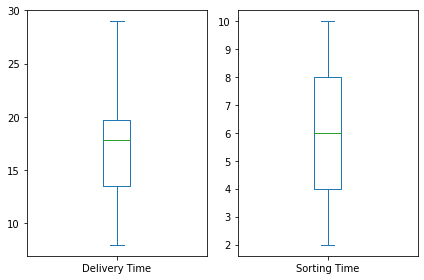

In [6]:
time_df.plot(kind='box',subplots=True)
plt.tight_layout();

### Co-relation Analysis

In [7]:
corelation=np.round(time_df.corr(),2)
corelation

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


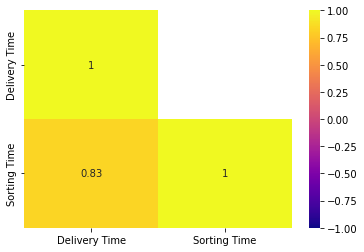

In [8]:
sns.heatmap(data=corelation,annot=True,vmax=1,vmin=-1,cmap='plasma',mask=np.triu(corelation,1));

### Check for Duplicates and empty rows

In [9]:
time_df.duplicated().sum()

0

In [10]:
from matplotlib.cbook import boxplot_stats
boxplot_stats(time_df['Sorting Time'])

[{'mean': 6.190476190476191,
  'iqr': 4.0,
  'cilo': 4.629591649317968,
  'cihi': 7.370408350682032,
  'whishi': 10,
  'whislo': 2,
  'fliers': array([], dtype=int64),
  'q1': 4.0,
  'med': 6.0,
  'q3': 8.0}]

In [11]:
time_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Model Building using Statsmodels

In [12]:
from statsmodels.formula.api import ols
time_df=time_df.rename({"Sorting Time":"SortingTime","Delivery Time":"DeliveryTime"},axis=1)
model=ols(formula='DeliveryTime ~ SortingTime',data=time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        11:12:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      

In [13]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [14]:
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [15]:
model.rsquared

0.6822714748417231

### Model Building using SKLEARN

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
slr_delivery=LinearRegression()

In [18]:
slr_delivery.fit(pd.DataFrame(time_df['SortingTime']),time_df['DeliveryTime'])

LinearRegression()

In [19]:
slr_delivery.intercept_

6.58273397199706

In [20]:
slr_delivery.coef_

array([1.6490199])

### RSquared value using SKLEARN

In [21]:
slr_delivery.score(pd.DataFrame(time_df['SortingTime']),time_df['DeliveryTime'])

0.6822714748417231

### Model Prediction with formula

In [22]:
Delivery_Time=model.params[0]+model.params[1]*11
Delivery_Time

24.72195283714075

### Model Prediction without formula

In [23]:
Test_Sorting_Time=pd.DataFrame([5,11,10],columns=["SortingTime"])

In [24]:
delivery_time=pd.DataFrame({"DeliveryTime": model.predict(Test_Sorting_Time)})

In [25]:
delivery_time

,DeliveryTime
0,14.827833
1,24.721953
2,23.072933


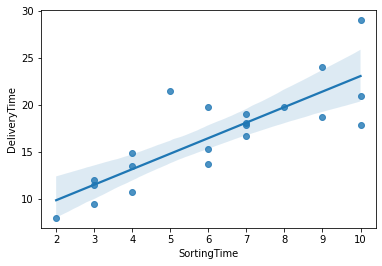

In [26]:
sns.regplot(data=time_df,x='SortingTime',y='DeliveryTime');

#### Since p value is less than 0.05 this model is significant and it is able to explain 68.22% of the variation in the target variable value that is delivery time.

## Simple Linear Regression- Predicting DeliveryTime-Transformed Data (Log)

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
time_df=pd.read_csv("delivery_time.csv")

In [29]:
time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [30]:
time_df["Log_Of_Sorting_Time"]=np.log(time_df["Sorting Time"])

In [31]:
time_df.head()

,Delivery Time,Sorting Time,Log_Of_Sorting_Time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


### Model Building using Statsmodels

In [32]:
from statsmodels.formula.api import ols
time_df=time_df.rename({"Log_Of_Sorting_Time":"LogOfSortingTime","Delivery Time":"DeliveryTime"},axis=1)
model=ols(formula='DeliveryTime ~ LogOfSortingTime',data=time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        11:12:54   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455  

In [33]:
model.params

Intercept           1.159684
LogOfSortingTime    9.043413
dtype: float64

In [34]:
model.pvalues

Intercept           0.641980
LogOfSortingTime    0.000003
dtype: float64

In [35]:
model.rsquared

0.6954434611324223

### Model Building using SKLEARN

In [36]:
from sklearn.linear_model import LinearRegression

slr_delivery=LinearRegression()

slr_delivery.fit(pd.DataFrame(time_df['LogOfSortingTime']),time_df['DeliveryTime'])

LinearRegression()

In [37]:
slr_delivery.intercept_

1.1596835115465645

In [38]:
slr_delivery.coef_

array([9.04341346])

### RSquared value using SKLEARN

In [39]:
slr_delivery.score(pd.DataFrame(time_df['LogOfSortingTime']),time_df['DeliveryTime'])

0.6954434611324223

### Model Prediction with formula

In [40]:
Delivery_Time=model.params[0]+model.params[1]*11
Delivery_Time

100.63723155180996

### Model Prediction without formula

In [41]:
Test_Sorting_Time=pd.DataFrame([5,11,10],columns=["LogOfSortingTime"])

In [42]:
delivery_time=pd.DataFrame({"DeliveryTime": model.predict(Test_Sorting_Time)})

In [43]:
delivery_time

,DeliveryTime
0,46.376751
1,100.637232
2,91.593818


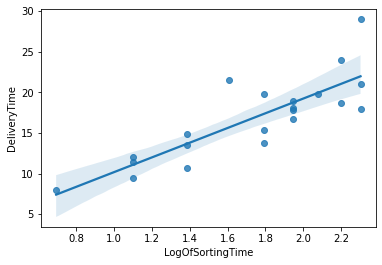

In [44]:
sns.regplot(data=time_df,x='LogOfSortingTime',y='DeliveryTime');

#### Since p value is less than 0.05 this model is significant and it is able to explain 69.54% of the variation in the target variable value that is delivery time.

## Simple Linear Regression- Predicting DeliveryTime-Transformed Data (Squared)

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [46]:
time_df=pd.read_csv("delivery_time.csv")

In [47]:
time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [48]:
time_df["Squared_Of_Sorting_Time"]=np.square(time_df["Sorting Time"])

In [49]:
time_df.head()

,Delivery Time,Sorting Time,Squared_Of_Sorting_Time
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


### Model Building using Statsmodels

In [50]:
from statsmodels.formula.api import ols
time_df=time_df.rename({"Squared_Of_Sorting_Time":"SquaredOfSortingTime","Delivery Time":"DeliveryTime"},axis=1)
model=ols(formula='DeliveryTime ~ SquaredOfSortingTime',data=time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.74e-05
Time:                        11:12:55   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.2372 

In [51]:
model.params

Intercept               11.237205
SquaredOfSortingTime     0.124870
dtype: float64

In [52]:
model.pvalues

Intercept               1.415704e-08
SquaredOfSortingTime    1.739194e-05
dtype: float64

In [53]:
model.rsquared

0.6302871815826637

### Model Building using SKLEARN

In [54]:
from sklearn.linear_model import LinearRegression

slr_delivery=LinearRegression()

slr_delivery.fit(pd.DataFrame(time_df['SquaredOfSortingTime']),time_df['DeliveryTime'])

LinearRegression()

In [55]:
slr_delivery.intercept_

11.237205188841067

In [56]:
slr_delivery.coef_

array([0.12487012])

### RSquared value using SKLEARN

In [57]:
slr_delivery.score(pd.DataFrame(time_df['SquaredOfSortingTime']),time_df['DeliveryTime'])

0.6302871815826638

### Model Prediction with formula

In [58]:
Delivery_Time=model.params[0]+model.params[1]*11
Delivery_Time

12.610776496525979

### Model Prediction without formula

In [59]:
Test_Sorting_Time=pd.DataFrame([5,11,10],columns=["SquaredOfSortingTime"])

delivery_time=pd.DataFrame({"DeliveryTime": model.predict(Test_Sorting_Time)})

delivery_time

,DeliveryTime
0,11.861556
1,12.610776
2,12.485906


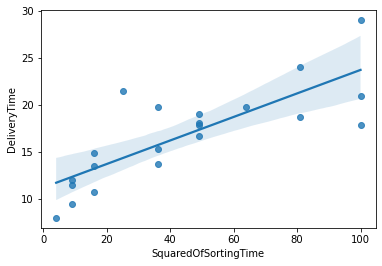

In [60]:
sns.regplot(data=time_df,x='SquaredOfSortingTime',y='DeliveryTime');

#### Since p value is less than 0.05 this model is significant and it is able to explain 63.02% of the variation in the target variable value that is delivery time.

## Simple Linear Regression- Predicting DeliveryTime-Transformed Data (SquareRoot)

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
time_df=pd.read_csv("delivery_time.csv")

time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [63]:
time_df["SquareRoot_Of_Sorting_Time"]=np.sqrt(time_df["Sorting Time"])

time_df.head()

,Delivery Time,Sorting Time,SquareRoot_Of_Sorting_Time
0,21.00,10,3.162278
1,13.50,4,2.000000
2,19.75,6,2.449490
3,24.00,9,3.000000
4,29.00,10,3.162278


### Model Building using Statsmodels

In [64]:
from statsmodels.formula.api import ols
time_df=time_df.rename({"SquareRoot_Of_Sorting_Time":"SquareRootOfSortingTime","Delivery Time":"DeliveryTime"},axis=1)
model=ols(formula='DeliveryTime ~ SquareRootOfSortingTime',data=time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        11:12:55   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [65]:
model.params

Intercept                 -2.518837
SquareRootOfSortingTime    7.936591
dtype: float64

In [66]:
model.pvalues

Intercept                  0.410857
SquareRootOfSortingTime    0.000003
dtype: float64

In [67]:
model.rsquared

0.6958062276308671

### Model Building using SKLEARN

In [68]:
from sklearn.linear_model import LinearRegression

slr_delivery=LinearRegression()

slr_delivery.fit(pd.DataFrame(time_df['SquareRootOfSortingTime']),time_df['DeliveryTime'])

LinearRegression()

In [69]:
slr_delivery.intercept_

-2.518836615838879

In [70]:
slr_delivery.coef_

array([7.93659075])

### RSquared value using SKLEARN

In [71]:
slr_delivery.score(pd.DataFrame(time_df['SquareRootOfSortingTime']),time_df['DeliveryTime'])

0.695806227630867

### Model Prediction with formula

In [72]:
Delivery_Time=model.params[0]+model.params[1]*11
Delivery_Time

84.78366165706383

### Model Prediction without formula

In [73]:
Test_Sorting_Time=pd.DataFrame([5,11,10],columns=["SquareRootOfSortingTime"])

delivery_time=pd.DataFrame({"DeliveryTime": model.predict(Test_Sorting_Time)})

delivery_time

,DeliveryTime
0,37.164117
1,84.783662
2,76.847071


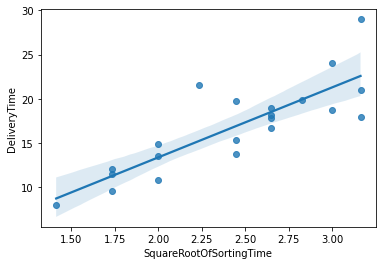

In [74]:
sns.regplot(data=time_df,x='SquareRootOfSortingTime',y='DeliveryTime');

#### Since p value is less than 0.05 this model is significant and it is able to explain 69.58% of the variation in the target variable value that is delivery time.

## Simple Linear Regression- Predicting DeliveryTime-Transformed Data (Exponential)

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [76]:
time_df=pd.read_csv("delivery_time.csv")

time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [77]:
time_df["Exponential_Of_Sorting_Time"]=np.exp(time_df["Sorting Time"])

time_df.head()

,Delivery Time,Sorting Time,Exponential_Of_Sorting_Time
0,21.00,10,22026.465795
1,13.50,4,54.598150
2,19.75,6,403.428793
3,24.00,9,8103.083928
4,29.00,10,22026.465795


### Model Building using Statsmodels

In [78]:
from statsmodels.formula.api import ols
time_df=time_df.rename({"Exponential_Of_Sorting_Time":"ExponentialOfSortingTime","Delivery Time":"DeliveryTime"},axis=1)
model=ols(formula='DeliveryTime ~ ExponentialOfSortingTime',data=time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 06 Mar 2023   Prob (F-statistic):            0.00396
Time:                        11:12:55   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [79]:
model.params

Intercept                   15.083578
ExponentialOfSortingTime     0.000393
dtype: float64

In [80]:
model.pvalues

Intercept                   1.117304e-11
ExponentialOfSortingTime    3.964511e-03
dtype: float64

In [81]:
model.rsquared

0.361117702270909

### Model Building using SKLEARN

In [82]:
from sklearn.linear_model import LinearRegression

slr_delivery=LinearRegression()

slr_delivery.fit(pd.DataFrame(time_df['ExponentialOfSortingTime']),time_df['DeliveryTime'])

LinearRegression()

In [83]:
slr_delivery.intercept_

15.083578039212629

In [84]:
slr_delivery.coef_

array([0.00039296])

### RSquared value using SKLEARN

In [85]:
slr_delivery.score(pd.DataFrame(time_df['ExponentialOfSortingTime']),time_df['DeliveryTime'])

0.361117702270909

### Model Prediction with formula

In [86]:
Delivery_Time=model.params[0]+model.params[1]*11
Delivery_Time

15.087900591384404

### Model Prediction without formula

In [87]:
Test_Sorting_Time=pd.DataFrame([5,11,10],columns=["ExponentialOfSortingTime"])

delivery_time=pd.DataFrame({"DeliveryTime": model.predict(Test_Sorting_Time)})

delivery_time

,DeliveryTime
0,15.085543
1,15.087901
2,15.087508


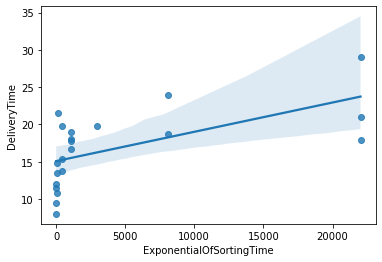

In [88]:
sns.regplot(data=time_df,x='ExponentialOfSortingTime',y='DeliveryTime');

#### Since p value is less than 0.05 this model is significant and it is able to explain 36.11% of the variation in the target variable value that is delivery time.

## Simple Linear Regression- Predicting Salary

In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [90]:
salary_df=pd.read_csv("Salary_Data.csv")

salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA

In [91]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [92]:
salary_df.shape

(30, 2)

### Outliers Detection

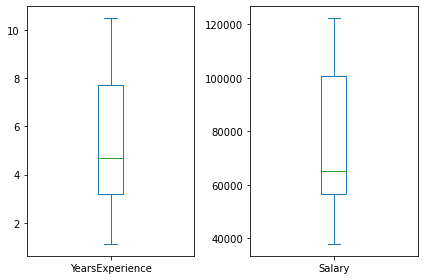

In [93]:
salary_df.plot(kind='box',subplots=True)
plt.tight_layout();

### Co-relation Analysis

In [94]:
corelation=np.round(salary_df.corr(),2)
corelation

,YearsExperience,Salary
YearsExperience,1.00,0.98
Salary,0.98,1.00


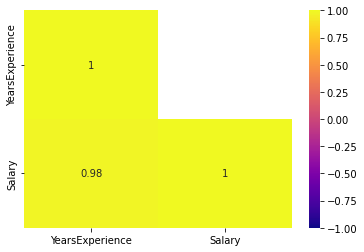

In [95]:
sns.heatmap(data=corelation,annot=True,vmax=1,vmin=-1,cmap='plasma',mask=np.triu(corelation,1));

### Check for Duplicates and empty rows

In [96]:
salary_df.duplicated().sum()

0

In [97]:
from matplotlib.cbook import boxplot_stats
boxplot_stats(salary_df['YearsExperience'])

[{'mean': 5.3133333333333335,
  'iqr': 4.5,
  'cilo': 3.410113377075334,
  'cihi': 5.989886622924667,
  'whishi': 10.5,
  'whislo': 1.1,
  'fliers': array([], dtype=float64),
  'q1': 3.2,
  'med': 4.7,
  'q3': 7.7}]

In [98]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Model Building using Statsmodels

In [99]:
from statsmodels.formula.api import ols

In [100]:
salary_df=salary_df.rename({"YearsExperience":"YearsOfExperience","Salary_Data.csv":"Salary"},axis=1)

In [101]:
model=ols(formula='Salary ~ YearsOfExperience',data=salary_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        11:12:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.579e+04   2273.05

In [102]:
model.params

Intercept            25792.200199
YearsOfExperience     9449.962321
dtype: float64

In [103]:
model.pvalues

Intercept            5.511950e-12
YearsOfExperience    1.143068e-20
dtype: float64

In [104]:
model.rsquared

0.9569566641435086

### Model Building using SKLEARN

In [105]:
from sklearn.linear_model import LinearRegression
slr_salary=LinearRegression()
slr_salary.fit(pd.DataFrame(salary_df['YearsOfExperience']),salary_df['Salary'])

LinearRegression()

In [106]:
slr_salary.intercept_

25792.20019866871

In [107]:
slr_salary.coef_

array([9449.96232146])

### RSquared value using SKLEARN

In [108]:
slr_salary.score(pd.DataFrame(salary_df['YearsOfExperience']),salary_df['Salary'])

0.9569566641435086

### Model Prediction with formula

In [109]:
Salary_Hike=model.params[0]+model.params[1]*1.2
Salary_Hike

37132.154984414796

### Model Prediction without formula

In [110]:
Test_YearsOfExperience=pd.DataFrame([1.2,3,5],columns=["YearsOfExperience"])
Test_YearsOfExperience

,YearsOfExperience
0,1.2
1,3.0
2,5.0


In [111]:
Salary_Hike=pd.DataFrame({"Salary_Hike": model.predict(Test_YearsOfExperience)})

In [112]:
Salary_Hike

,Salary_Hike
0,37132.154984
1,54142.087163
2,73042.011806


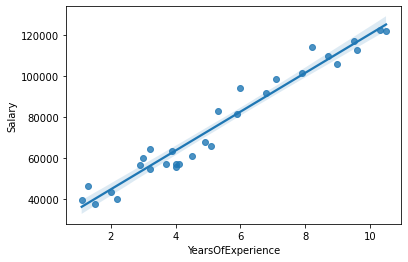

In [113]:
sns.regplot(data=salary_df,x='YearsOfExperience',y='Salary');

#### Since p value is less than 0.05 this model is significant and it is able to explain 95.69% of the variation in the target variable value that is Salary Hike.

## Simple Linear Regression- Predicting Salary-Transformed Data(Log)

In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [115]:
salary_df=pd.read_csv("Salary_Data.csv")

salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [116]:
salary_df["Log_Of_YearsExperience"]=np.log(salary_df["YearsExperience"])

salary_df.head()

,YearsExperience,Salary,Log_Of_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


### Model Building using Statsmodels

In [117]:
from statsmodels.formula.api import ols

salary_df=salary_df.rename({"Log_Of_YearsExperience":"LogOfYearsExperience","Salary_Data.csv":"Salary"},axis=1)

model=ols(formula='Salary ~ LogOfYearsExperience',data=salary_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        11:12:57   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.493e+04 

In [118]:
model.params

Intercept               14927.97177
LogOfYearsExperience    40581.98796
dtype: float64

In [119]:
model.pvalues

Intercept               7.268813e-03
LogOfYearsExperience    3.250155e-13
dtype: float64

In [120]:
model.rsquared

0.8538888828756969

### Model Building using SKLEARN

In [121]:
from sklearn.linear_model import LinearRegression
slr_salary=LinearRegression()
slr_salary.fit(pd.DataFrame(salary_df['LogOfYearsExperience']),salary_df['Salary'])

LinearRegression()

In [122]:
slr_salary.intercept_

14927.971770057287

In [123]:
slr_salary.coef_

array([40581.98795978])

### RSquared value using SKLEARN

In [124]:
slr_salary.score(pd.DataFrame(salary_df['LogOfYearsExperience']),salary_df['Salary'])

0.853888882875697

### Model Prediction with formula

In [125]:
Salary_Hike=model.params[0]+model.params[1]*1.2
Salary_Hike

63626.35732179214

### Model Prediction without formula

In [126]:
Test_YearsOfExperience=pd.DataFrame([1.2,3,5],columns=["LogOfYearsExperience"])
Test_YearsOfExperience

Salary_Hike=pd.DataFrame({"Salary_Hike": model.predict(Test_YearsOfExperience)})

Salary_Hike

,Salary_Hike
0,63626.357322
1,136673.935649
2,217837.911569


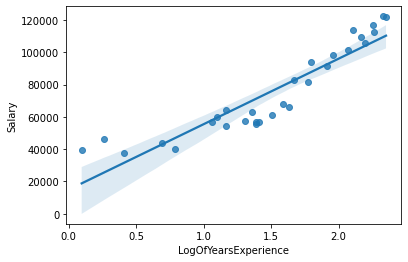

In [127]:
sns.regplot(data=salary_df,x='LogOfYearsExperience',y='Salary');

#### Since p value is less than 0.05 this model is significant and it is able to explain 85.38% of the variation in the target variable value that is Salary Hike.

## Simple Linear Regression- Predicting Salary-Transformed Data(Squared)

In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [129]:
salary_df=pd.read_csv("Salary_Data.csv")

salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [130]:
salary_df["Squared_Of_YearsExperience"]=np.square(salary_df["YearsExperience"])

salary_df.head()

,YearsExperience,Salary,Squared_Of_YearsExperience
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


### Model Building using Statsmodels

In [131]:
from statsmodels.formula.api import ols

salary_df=salary_df.rename({"Squared_Of_YearsExperience":"SquaredOfYearsExperience","Salary_Data.csv":"Salary"},axis=1)

model=ols(formula='Salary ~ SquaredOfYearsExperience',data=salary_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.52e-16
Time:                        11:12:57   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [132]:
model.params

Intercept                   48042.585515
SquaredOfYearsExperience      776.318773
dtype: float64

In [133]:
model.pvalues

Intercept                   3.389190e-19
SquaredOfYearsExperience    1.518127e-16
dtype: float64

In [134]:
model.rsquared

0.9153198857852565

### Model Building using SKLEARN

In [135]:
from sklearn.linear_model import LinearRegression
slr_salary=LinearRegression()
slr_salary.fit(pd.DataFrame(salary_df['SquaredOfYearsExperience']),salary_df['Salary'])

LinearRegression()

In [136]:
slr_salary.intercept_

48042.585514584905

In [137]:
slr_salary.coef_

array([776.31877331])

### RSquared value using SKLEARN

In [138]:
slr_salary.score(pd.DataFrame(salary_df['SquaredOfYearsExperience']),salary_df['Salary'])

0.9153198857852564

### Model Prediction with formula

In [139]:
Salary_Hike=model.params[0]+model.params[1]*1.2
Salary_Hike

48974.16804255799

### Model Prediction without formula

In [140]:
Test_YearsOfExperience=pd.DataFrame([1.2,3,5],columns=["SquaredOfYearsExperience"])
Test_YearsOfExperience

Salary_Hike=pd.DataFrame({"Salary_Hike": model.predict(Test_YearsOfExperience)})

Salary_Hike

,Salary_Hike
0,48974.168043
1,50371.541835
2,51924.179381


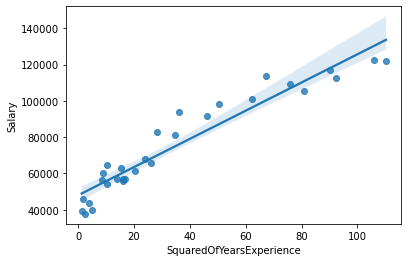

In [141]:
sns.regplot(data=salary_df,x='SquaredOfYearsExperience',y='Salary');

#### Since p value is less than 0.05 this model is significant and it is able to explain 91.53% of the variation in the target variable value that is Salary Hike.b

## Simple Linear Regression- Predicting Salary-Transformed Data(SquareRoot)

In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [143]:
salary_df=pd.read_csv("Salary_Data.csv")

salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [144]:
salary_df["SquareRoot_Of_YearsExperience"]=np.sqrt(salary_df["YearsExperience"])

salary_df.head()

,YearsExperience,Salary,SquareRoot_Of_YearsExperience
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240


### Model Building using Statsmodels

In [145]:
from statsmodels.formula.api import ols

salary_df=salary_df.rename({"SquareRoot_Of_YearsExperience":"SquareRootOfYearsExperience","Salary_Data.csv":"Salary"},axis=1)

model=ols(formula='Salary ~ SquareRootOfYearsExperience',data=salary_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        11:12:57   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [146]:
model.params

Intercept                     -16055.769117
SquareRootOfYearsExperience    41500.680583
dtype: float64

In [147]:
model.pvalues

Intercept                      2.906965e-03
SquareRootOfYearsExperience    8.565358e-18
dtype: float64

In [148]:
model.rsquared

0.9310009544993526

### Model Building using SKLEARN

In [149]:
from sklearn.linear_model import LinearRegression
slr_salary=LinearRegression()
slr_salary.fit(pd.DataFrame(salary_df['SquareRootOfYearsExperience']),salary_df['Salary'])

LinearRegression()

In [150]:
slr_salary.intercept_

-16055.769116956377

In [151]:
slr_salary.coef_

array([41500.68058303])

### RSquared value using SKLEARN

In [152]:
slr_salary.score(pd.DataFrame(salary_df['SquareRootOfYearsExperience']),salary_df['Salary'])

0.9310009544993526

### Model Prediction with formula

In [153]:
Salary_Hike=model.params[0]+model.params[1]*1.2
Salary_Hike

33745.047582674204

### Model Prediction without formula

In [154]:
Test_YearsOfExperience=pd.DataFrame([1.2,3,5],columns=["SquareRootOfYearsExperience"])
Test_YearsOfExperience

Salary_Hike=pd.DataFrame({"Salary_Hike": model.predict(Test_YearsOfExperience)})

Salary_Hike

,Salary_Hike
0,33745.047583
1,108446.272632
2,191447.633798


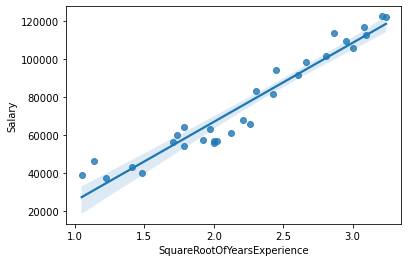

In [155]:
sns.regplot(data=salary_df,x='SquareRootOfYearsExperience',y='Salary');

#### Since p value is less than 0.05 this model is significant and it is able to explain 93.10% of the variation in the target variable value that is Salary Hike.

## Simple Linear Regression- Predicting Salary-Transformed Data(Exponential)

In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [157]:
salary_df=pd.read_csv("Salary_Data.csv")

salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [158]:
salary_df["Exponential_Of_YearsExperience"]=np.exp(salary_df["YearsExperience"])

salary_df.head()

,YearsExperience,Salary,Exponential_Of_YearsExperience
0,1.1,39343.0,3.004166
1,1.3,46205.0,3.669297
2,1.5,37731.0,4.481689
3,2.0,43525.0,7.389056
4,2.2,39891.0,9.025013


### Model Building using Statsmodels

In [159]:
from statsmodels.formula.api import ols

salary_df=salary_df.rename({"Exponential_Of_YearsExperience":"ExponentialOfYearsExperience","Salary_Data.csv":"Salary"},axis=1)

model=ols(formula='Salary ~ ExponentialOfYearsExperience',data=salary_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.72e-05
Time:                        11:12:58   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [160]:
model.params

Intercept                       67568.624969
ExponentialOfYearsExperience        2.136040
dtype: float64

In [161]:
model.pvalues

Intercept                       4.888835e-16
ExponentialOfYearsExperience    2.721588e-05
dtype: float64

In [162]:
model.rsquared

0.47238440560728734

### Model Building using SKLEARN

In [163]:
from sklearn.linear_model import LinearRegression
slr_salary=LinearRegression()
slr_salary.fit(pd.DataFrame(salary_df['ExponentialOfYearsExperience']),salary_df['Salary'])

LinearRegression()

In [164]:
slr_salary.intercept_

67568.62496898072

In [165]:
slr_salary.coef_

array([2.13604036])

### RSquared value using SKLEARN

In [166]:
slr_salary.score(pd.DataFrame(salary_df['ExponentialOfYearsExperience']),salary_df['Salary'])

0.47238440560728745

### Model Prediction with formula

In [167]:
Salary_Hike=model.params[0]+model.params[1]*1.2
Salary_Hike

67571.18821741105

### Model Prediction without formula

In [168]:
Test_YearsOfExperience=pd.DataFrame([1.2,3,5],columns=["ExponentialOfYearsExperience"])
Test_YearsOfExperience

Salary_Hike=pd.DataFrame({"Salary_Hike": model.predict(Test_YearsOfExperience)})

Salary_Hike

,Salary_Hike
0,67571.188217
1,67575.033090
2,67579.305171


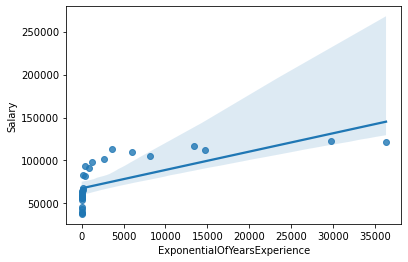

In [169]:
sns.regplot(data=salary_df,x='ExponentialOfYearsExperience',y='Salary');

#### Since p value is less than 0.05 this model is significant and it is able to explain 47.23% of the variation in the target variable value that is Salary Hike.